# Tokyo 2020 Olympics EDA

## Introduction

For this project, we will be using the 2021 Olympics in Tokyo Dataset available on Kaggle. It is comprised of four diferents spreadsheets:
* Athletes.xlsx
* EntriesGender.xlsx
* Medals.xlsx
* Teams.xlsx


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

## Data Handling and Cleaning

#### Read Datasets

In [2]:
athletes_df = pd.read_excel('Athletes.xlsx')
gender_df = pd.read_excel('EntriesGender.xlsx')
medals_df = pd.read_excel('Medals.xlsx')
teams_df = pd.read_excel('Teams.xlsx')

In [3]:
athletes_df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [4]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [5]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [6]:
gender_df.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [7]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


In [8]:
teams_df.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [9]:
medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [10]:
medals_df.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


#### Check for missing values

In [11]:
athletes_df.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [12]:
gender_df.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [13]:
medals_df.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [14]:
teams_df.isnull().sum()

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

#### Luckily, no datasets we will be using in this project have missing values, great! We can then jump to the Exploratory Data Analysis.

## EDA
#### Let's pose some questions:

### What Was the Distribution of Athletes by Country?

In [15]:
athletes_df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [16]:
# Group the athletes
top_20_countries = athletes_df.groupby('NOC').agg({'Name':'count'}).sort_values('Name', ascending=False).reset_index().head(20)
top_20_countries.rename(columns={'NOC':'Country','Name':'Number of Athletes'},inplace=True)

Text(0.5, 202.75000000000003, 'Total number of athletes')

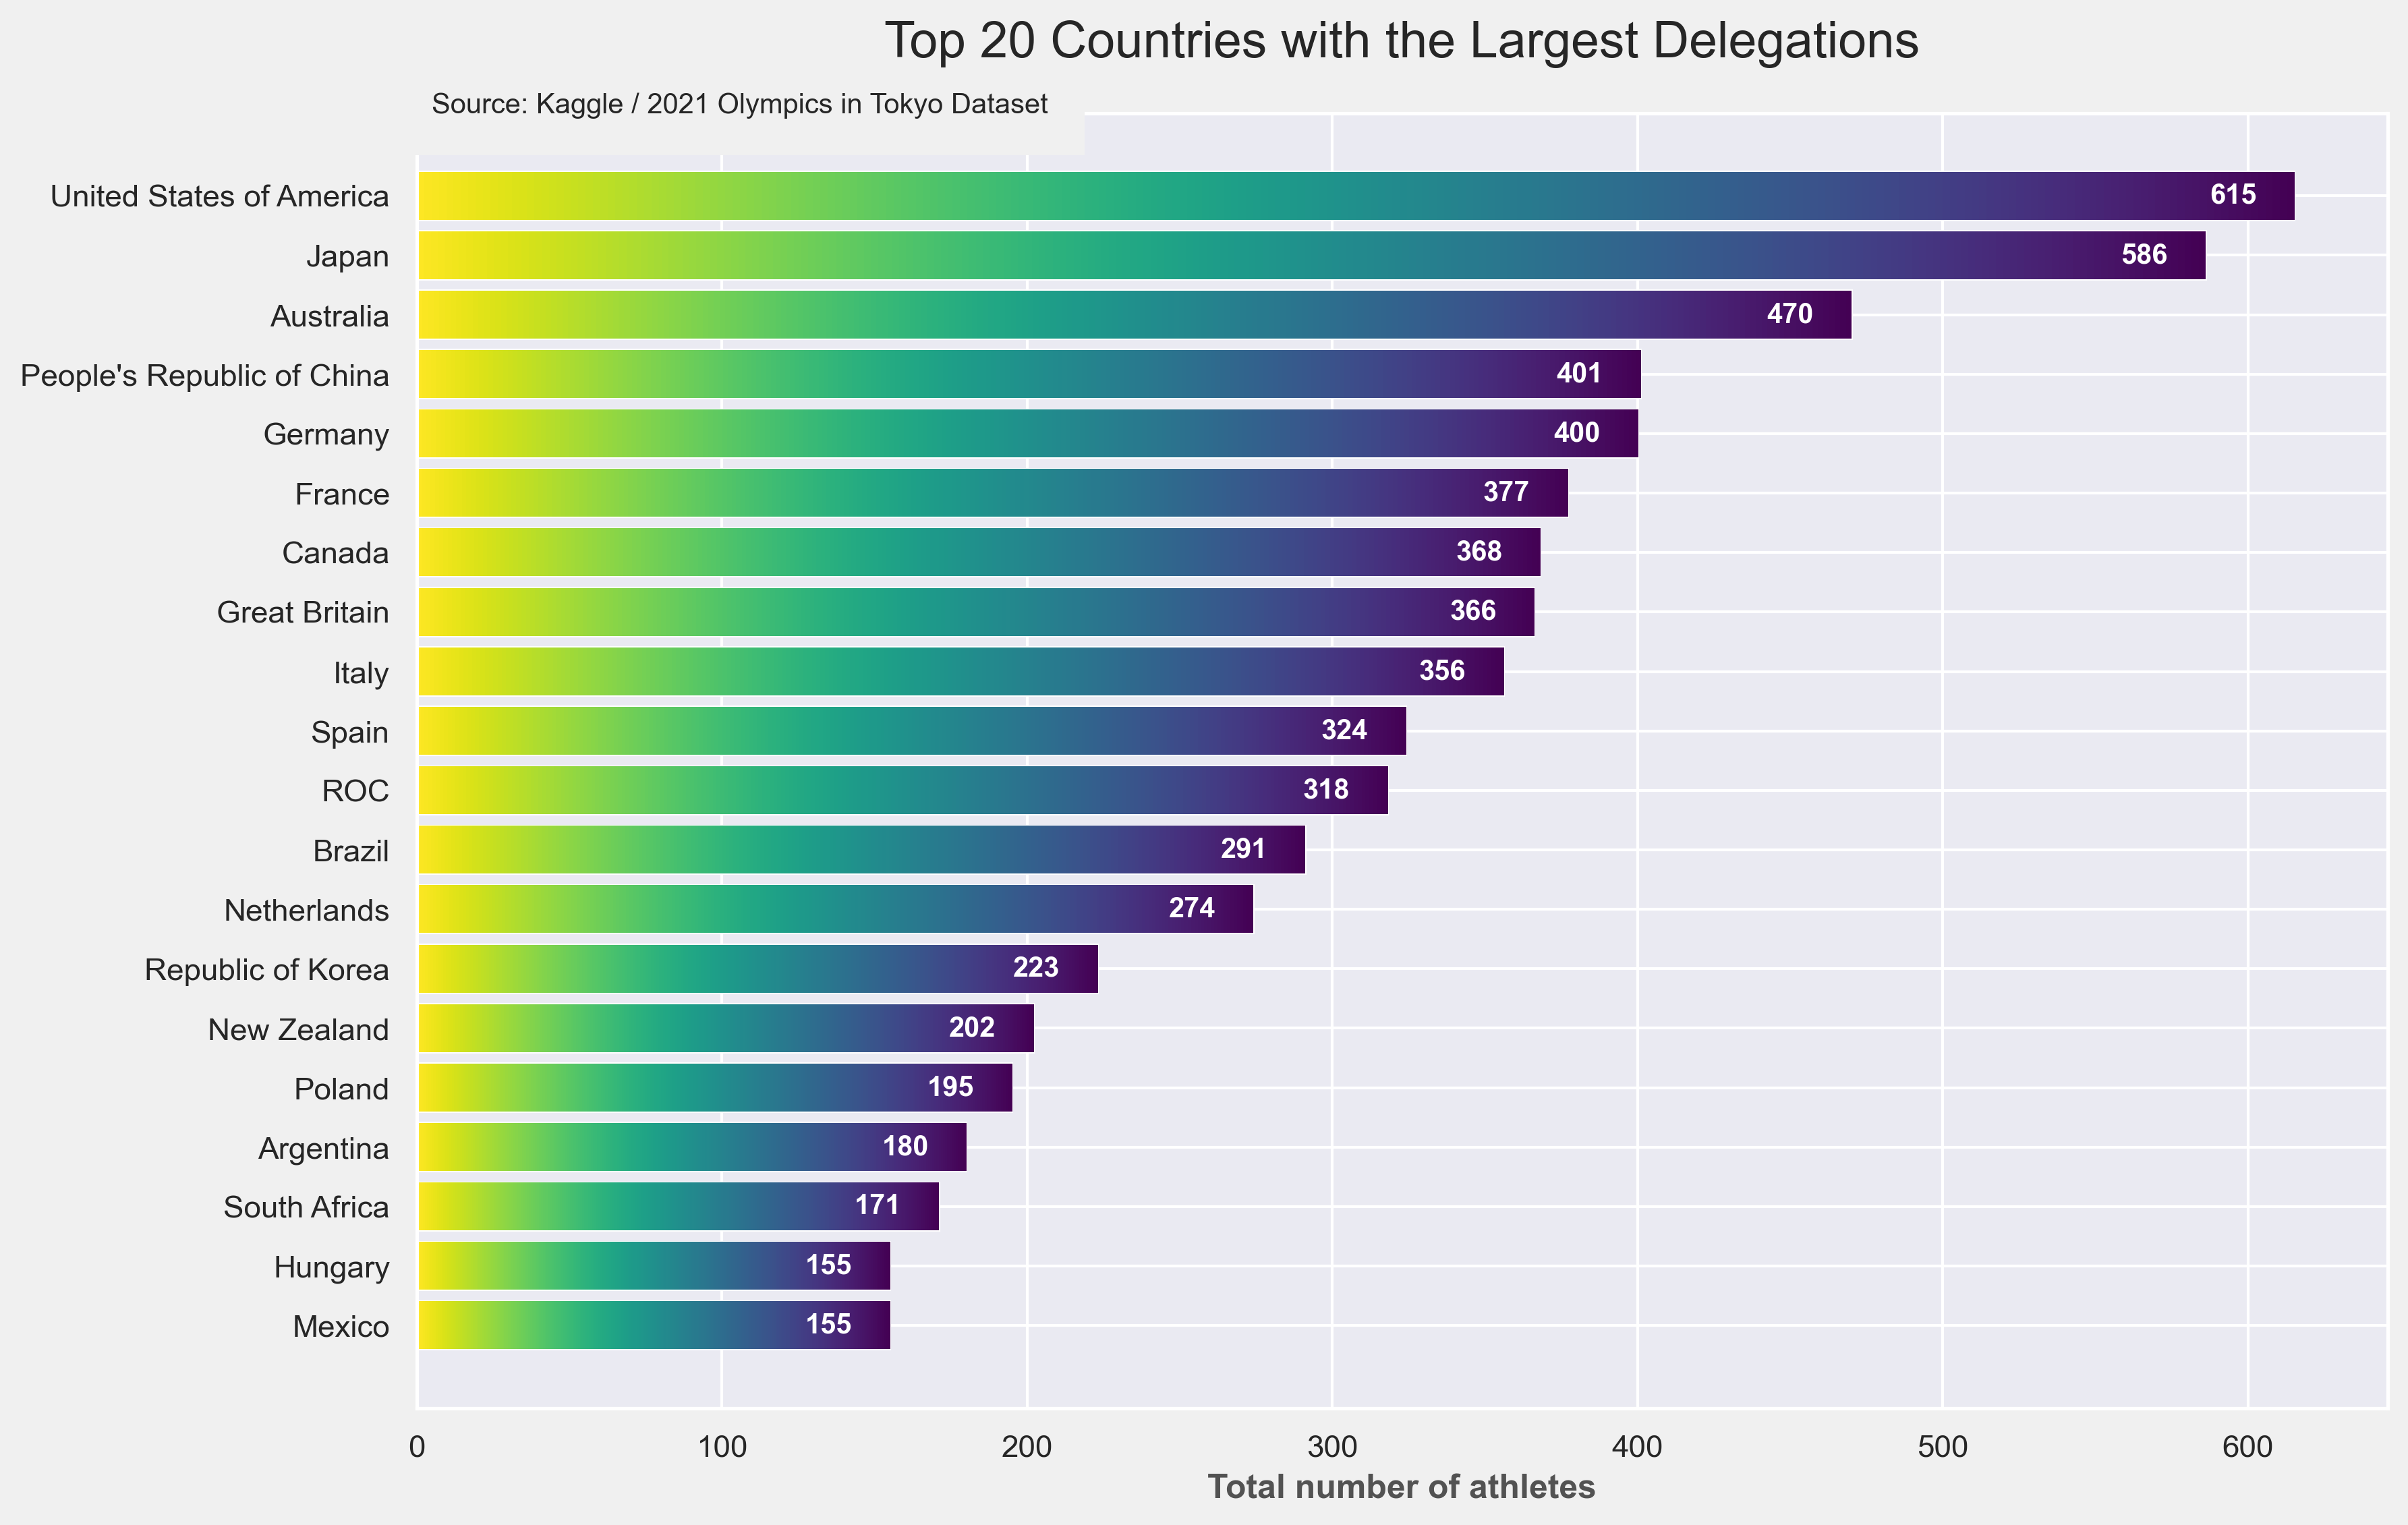

In [63]:
# Define the plot variables

top_20_countries.sort_values('Number of Athletes', ascending=True, inplace=True)
index = top_20_countries['Country']
values = top_20_countries['Number of Athletes']
plot_title = 'Top 20 Countries with the Largest Delegations'
title_size = 18
subtitle = 'Source: Kaggle / 2021 Olympics in Tokyo Dataset'
x_label = 'Total number of athletes'
filename = 'barh-plot'

# Create the figure with a subplot
fig, ax = plt.subplots(figsize=(12,8), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()
plt.rcParams['figure.dpi'] = 300

# Create the bars
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create the title, font size and position
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.5, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# Create the gradient background
ax.grid(zorder=0)

# Create the function to define the gradient
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

# Create bar labels/annotations
rects = ax.patches

# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords='offset points',va='center',ha=ha,color = 'white',fontweight = 'bold')            

# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='#525252',fontweight='bold')

#### There is a considerable lead of USA and Japan in the number os athletes participating in 2020 Tokyo Olympics. 
#### This data makes sense, since USA is historically the country that sends most athletes to the Olympics. 
#### And although Japan was already expected to have a large delegation, the second place in number of athletes is mostly due to Japan being the host country.

### What Was This Worldwide Distribution Like?

First, we need to take care of the ROC entry. Choropleth does not recognize 'ROC' as a country name. So let's change it.

In [18]:
# Group by countries
most_athletes = athletes_df.groupby('NOC').agg({'Name':'count'}).sort_values('Name', ascending=False).reset_index()
most_athletes.rename(columns={'NOC':'Country','Name':'Number of Athletes'},inplace=True)

In [19]:
most_athletes.loc[most_athletes['Country'] == 'ROC','Country'] = 'Russia'

In [77]:
# Set the graph main data and specifications
plot = px.choropleth(
    data_frame = most_athletes,
    locations = 'Country',
    locationmode = 'country names',
    color = 'Number of Athletes',
    labels = dict(
        NOC = 'Country',
        Name = 'Number of Athletes'),
    color_continuous_scale = 'magma_r',
    range_color = (0,700),
    title = 'Worldwide Distribution of Athletes',
    hover_name = 'Country',
    hover_data = {'Number of Athletes':True, 'Country':False},
    height = 550,
    width = 950
)

# Set map characteristics
plot.update_geos(
    resolution = 110,
    showland = True, landcolor = 'white',
    showocean = True, oceancolor = 'paleturquoise'
)

# Set layout characteristics
plot.update_layout(
    title = dict(font = dict(family='Arial', size = 25)),
    font = dict(family = 'Arial', size = 10),
    title_x = 0.5,
    annotations = [dict(
        x=0.5,
        y=-0.1,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text='<br>Source: Kaggle / 2021 Olympics in Tokyo Dataset',
        showarrow = False)]
)

plot.show()

#### What does this picture shows us?
#### Well, maybe apart from Brazil, the heatmap makes it clear that most of the countries with the most number of athletes are developed countries.
#### We can also see that Africa, with the exception of South Africa and Egypt, is the continent with the lowest number of competitors, and the graph illustrates that this difference is huge if we put it in comparison to the rest of the world.
#### Curiously, when taking regions into consideration, the Southwest Asia seems to be the area with the lowest percentage of participation in the Olympics (with the exception of New Zealand).

### What Were the Top 20 Disciplines with Most Participants?

In [21]:
top_20_disciplines = gender_df[['Discipline','Total']].sort_values(by='Total',ascending=False).head(20)

Text(0.5, 202.75000000000003, 'Total number of athletes')

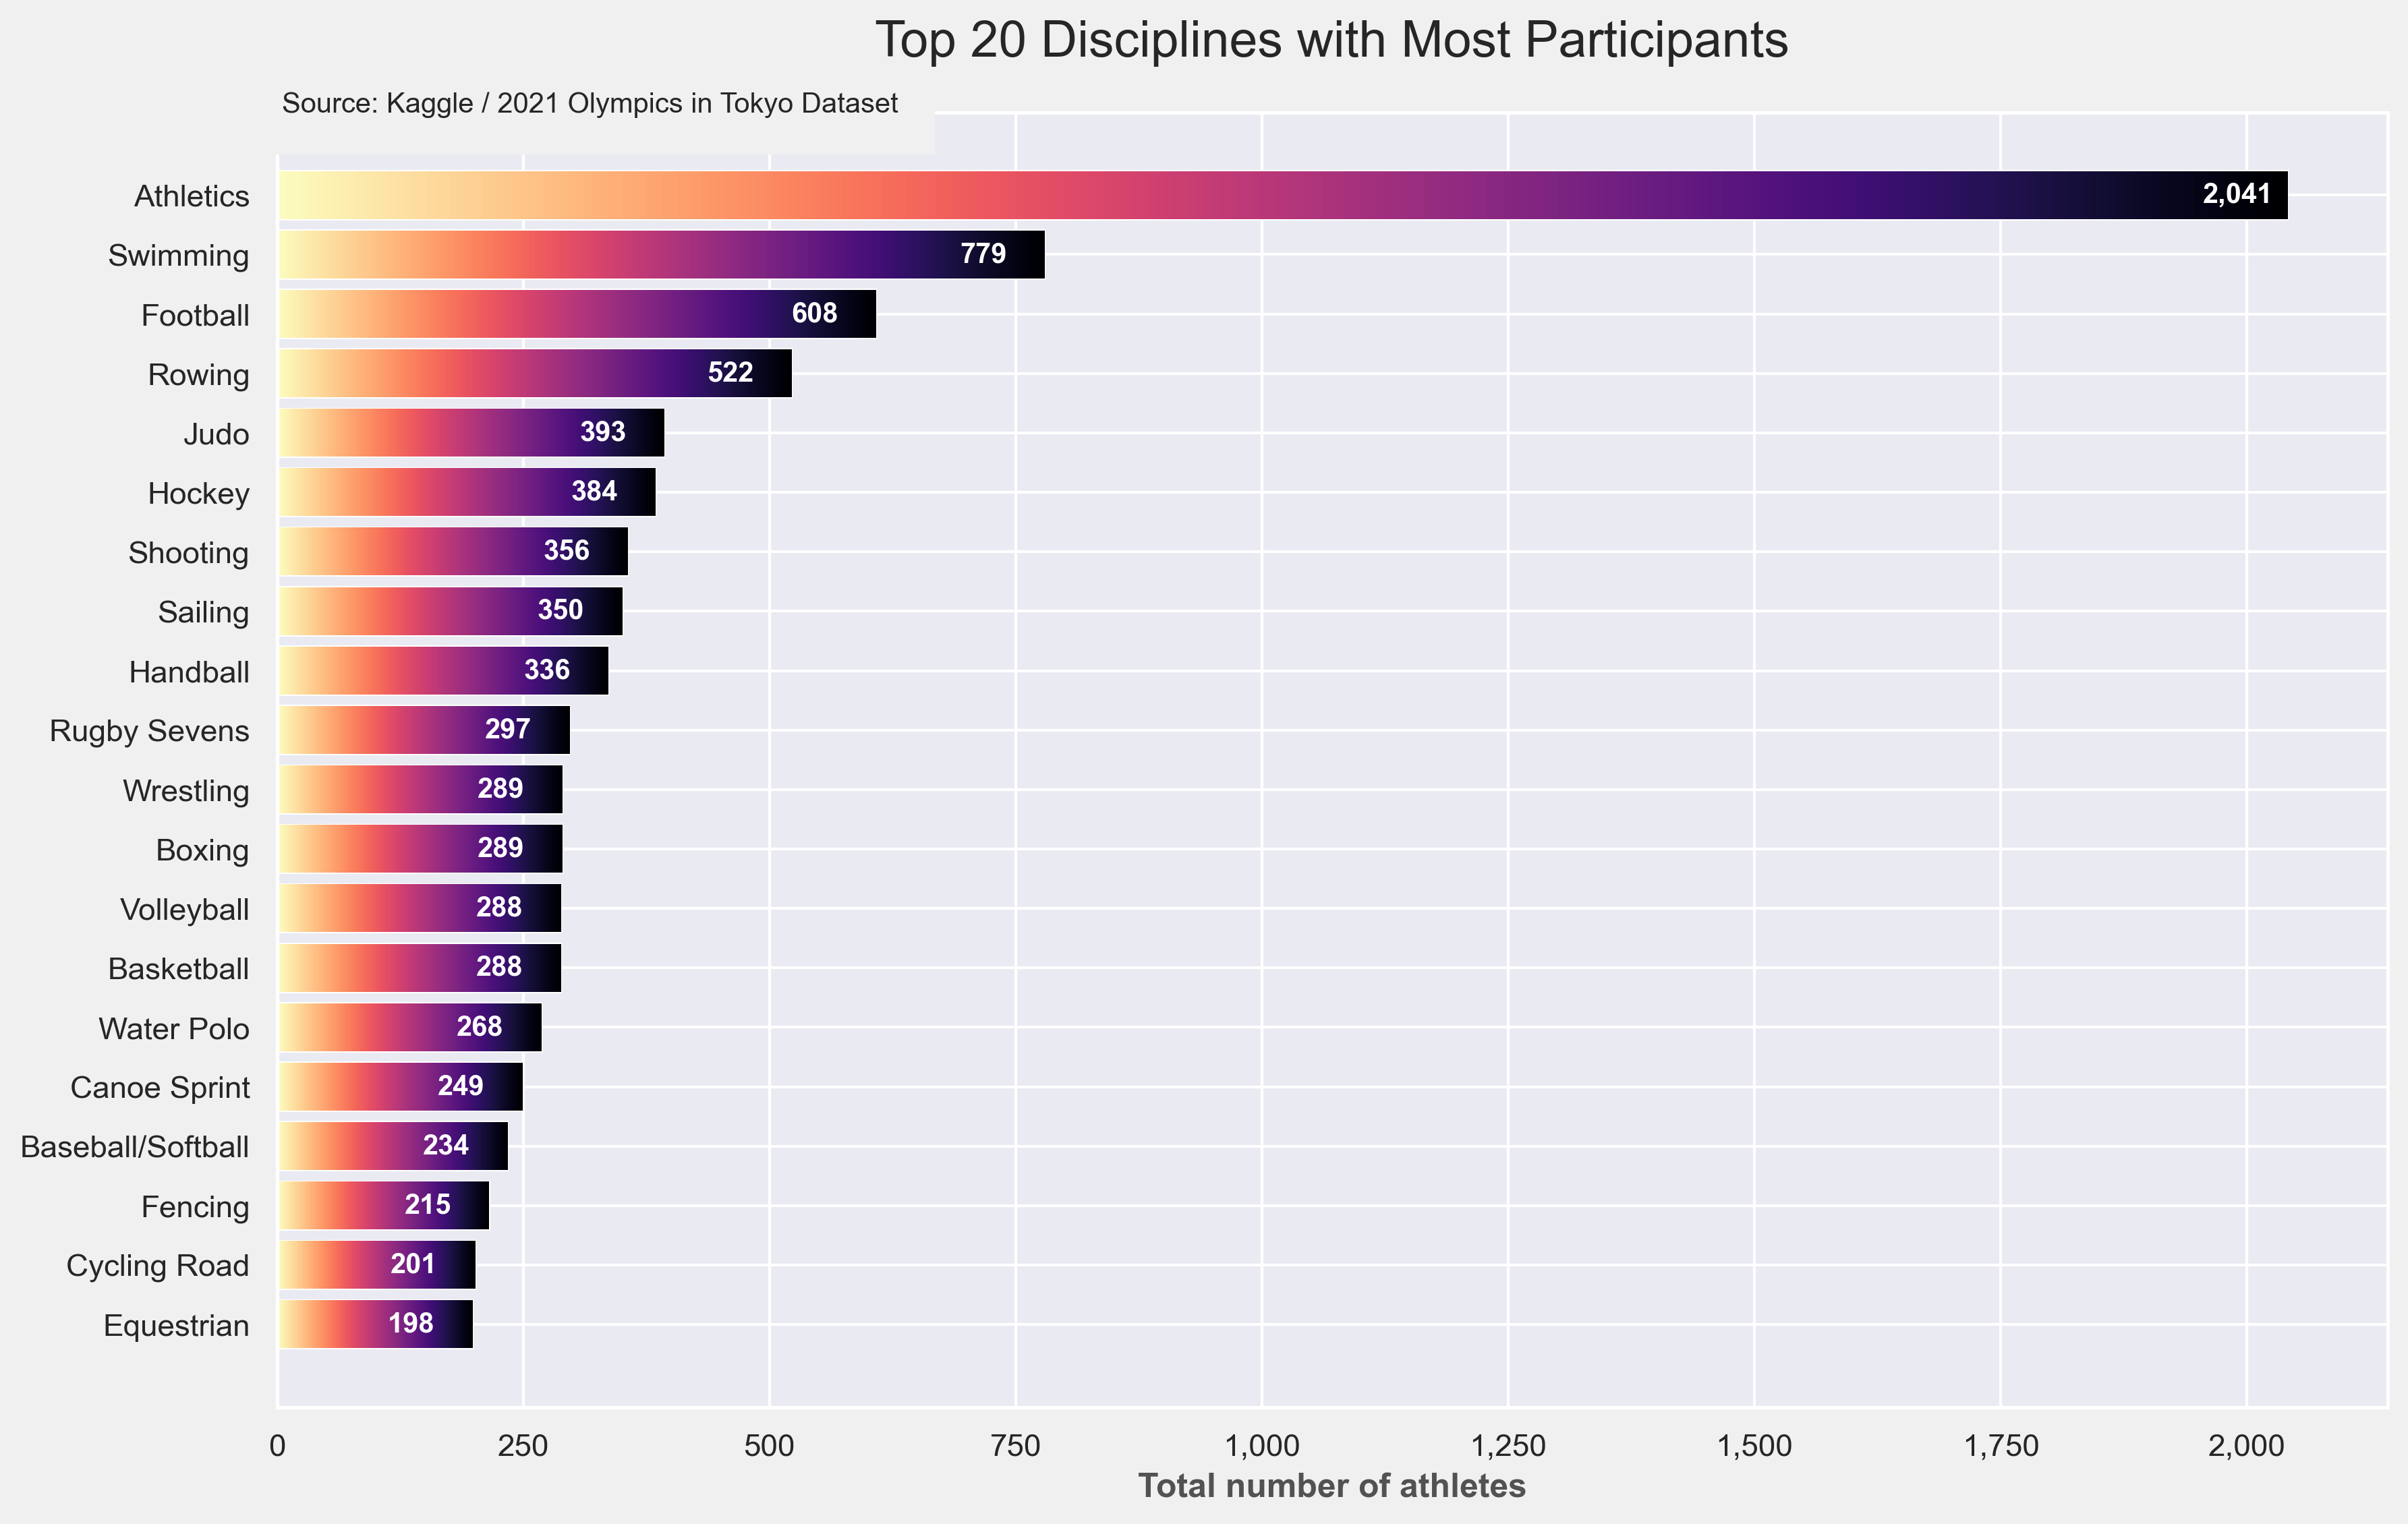

In [22]:
# Define the plot variables
top_20_disciplines.sort_values('Total', ascending=True, inplace=True)
index = top_20_disciplines['Discipline']
values = top_20_disciplines['Total']
plot_title = 'Top 20 Disciplines with Most Participants'
title_size = 18
subtitle = 'Source: Kaggle / 2021 Olympics in Tokyo Dataset'
x_label = 'Total number of athletes'
filename = 'barh-plot'

# Create the graph figure with a subplot
fig, ax = plt.subplots(figsize=(12,8), facecolor=(.94, .94, .94))
mpl.pyplot.magma()
plt.rcParams['figure.dpi'] = 300

# Create the bars
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create the title, font size and position
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.5, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# Create the gradient background
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

# Create bar labels/annotations
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords='offset points',va='center',ha=ha,color = 'white',fontweight = 'bold')            

# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='#525252',fontweight='bold')

### What Was the Gender Distribution by Category Like?

In [23]:
discipline_gender = gender_df.sort_values('Discipline')

In [24]:
# plot
discipline_gender.sort_values('Discipline', ascending=False, inplace=True)
fig4 = go.Figure(
    data = [
        # data for males
        go.Bar(
            name='Male', # name for this bar chart 
            y=discipline_gender['Discipline'], # sports data
            x=discipline_gender['Male'] / discipline_gender['Total'], # male ratio competeing
            orientation='h', # horizontal chart
            # bar colors and aesthetics
            marker=dict(color='gold', line=dict(color='black', width=2))
        ),
        # data for females
        go.Bar(
            name='Female',  # name for this bar chart 
            y=discipline_gender['Discipline'], # sports data
            x=discipline_gender['Female']/discipline_gender['Total'], # female ratio competeing
            orientation='h',
            # bar colors and aesthetics
            marker=dict(color='tomato', line=dict(color='black', width=2))
        ),
    ]
)
fig4.update_layout(
    barmode='relative', 
    margin = dict(pad=5), 
    title = dict(
        text='Distribution of Disciplines by Gender<br><sup>Source: Kaggle / 2021 Olympics in Tokyo Dataset</sup>',
        font=dict(family='Arial', size=25),        
    ),
    title_x = 0.5,
    font = dict(family='Arial', size=13), # font for axis labels
    height = 1100, 
    width = 750,
    xaxis_tickformat = '.1%', # fix x axis format ; try commenting to see difference
    template = 'plotly_white', # theme
    legend = dict(title='Gender') # legend name 
)
fig4.show()

### What Were the Top 20 Countries with The Most Olympic Medals?

In [25]:
m1 = medals_df.sort_values(by='Rank').head(20)

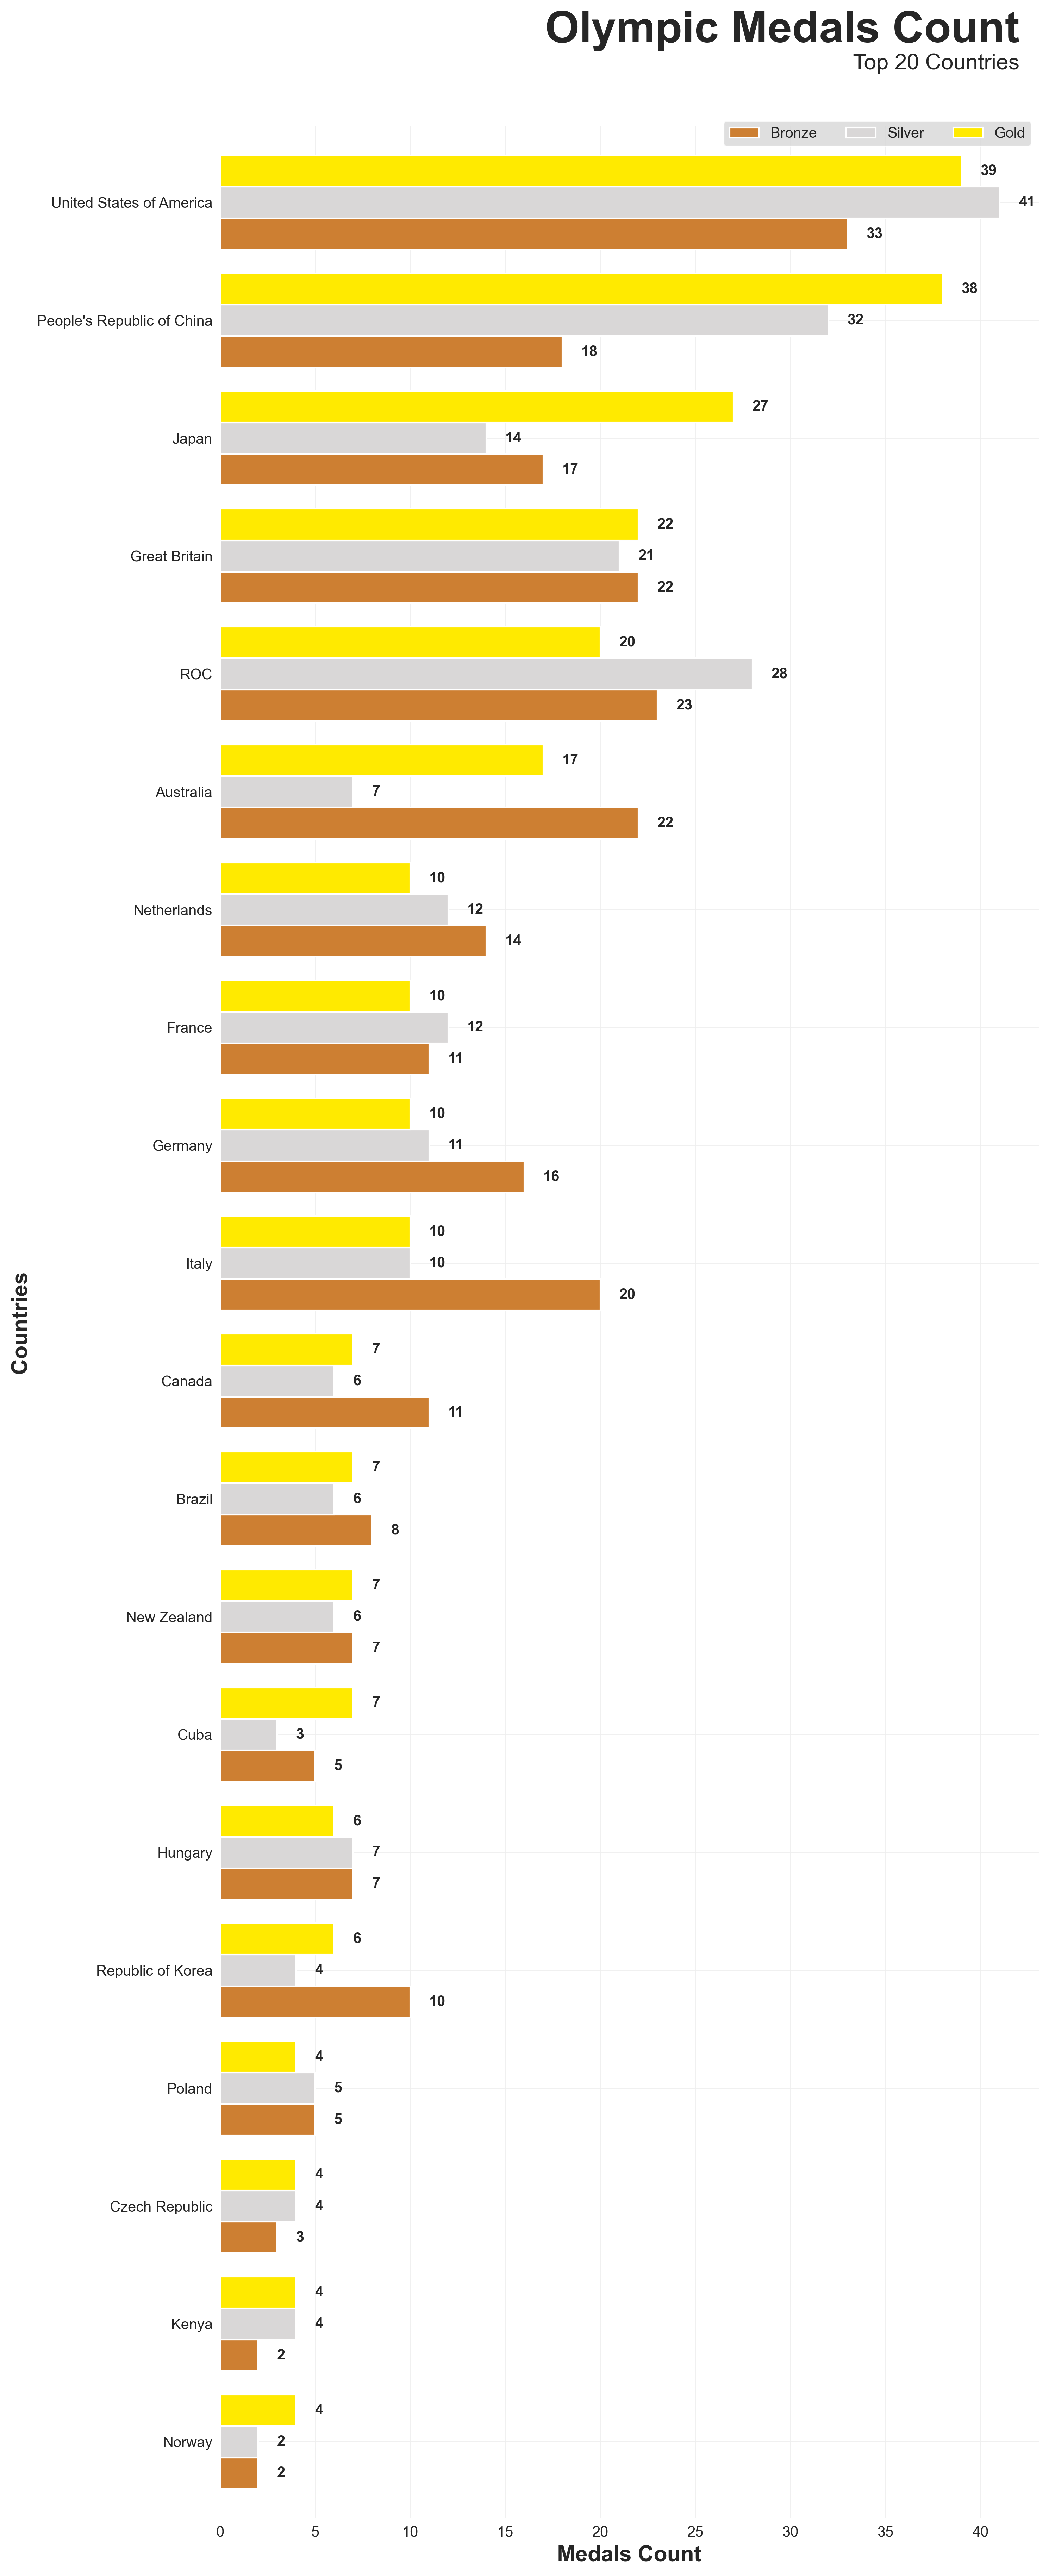

In [26]:
top_20_medals = m1.sort_index(ascending=False)
# Medals barplot
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(10,30), facecolor='white')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "white"
sns.set_palette(['#CD7F32','#d9d7d7','#ffea00'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = top_20_medals.plot(x='Team/NOC',y=['Bronze','Silver','Gold'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Medals Count',fontsize=15, weight='bold',)
ax0_sns.set_ylabel('Countries',fontsize=15, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=10, width=0.5, length=1.5)

ax0_sns.legend(['Bronze', 'Silver','Gold'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=10, bbox_to_anchor=(1, 1.005), loc='upper right')

for p in ax0_sns.patches:
        value = f'{p.get_width():.0f}'
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=10, fontweight='bold')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend-1, Yend+0.71, f'Olympic Medals Count', fontsize=30, weight='bold',ha='right')
ax0.text(Xend-1, Yend+0.48,f' Top 20 Countries',fontsize=15,ha='right')
# ax0_sns.text(Xend+13,Yend, f'Ankit Kalauni',alpha=0.3, fontsize=30, weight='bold',ha='right',color='w') #ignore this line if you reading this

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### What Were the Top 20 Countries with Highest Ratio of Medals Won vs. Population

In [27]:
# Let's fix the Russia name value for this dataset too
medals_df.loc[medals_df['Team/NOC'] == 'ROC','Team/NOC'] = 'Russia'

In [28]:
# Here we'll import a library to get the population of each country
from countryinfo import CountryInfo

In [29]:
def get_population(country):
    try:
        country = CountryInfo(country)
        return country.info()['population']
    except:
        return 'Not Found'
    
medals_df['Population'] = medals_df.apply(lambda x: get_population(x['Team/NOC']),axis=1)

In [30]:
medals_df['Population'].dtype

dtype('O')

In [31]:
# Convert the object type to numeric
medals_df['Population'] = pd.to_numeric(medals_df['Population'], errors="coerce")

In [32]:
medals_df['Population'].dtype

dtype('float64')

In [33]:
medals_df['Medals_Population_Ratio'] = (medals_df['Total'] / medals_df['Population']) * 100

In [34]:
top_20_medals_ratio = medals_df.sort_values(by='Medals_Population_Ratio', ascending=False).head(20).reset_index(drop=True).drop('Rank',axis=1)

In [35]:
top_20_medals_ratio.head(20)

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Population,Medals_Population_Ratio
0,San Marino,0,1,2,3,60,32743.0,0.009162
1,Bermuda,1,0,0,1,77,64237.0,0.001557
2,Grenada,0,0,1,1,77,103328.0,0.000968
3,New Zealand,7,6,7,20,13,4547900.0,0.000440
4,Jamaica,4,1,4,9,26,2717991.0,0.000331
5,Slovenia,3,1,1,5,42,2064966.0,0.000242
6,Fiji,1,0,1,2,66,859178.0,0.000233
7,Netherlands,10,12,14,36,9,16881000.0,0.000213
8,Hungary,6,7,7,20,13,9879000.0,0.000202
9,Denmark,3,4,4,11,23,5655750.0,0.000194


In [36]:
top_20_medals_ratio.loc[[3,7,10]]

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Population,Medals_Population_Ratio
3,New Zealand,7,6,7,20,13,4547900.0,0.000440
7,Netherlands,10,12,14,36,9,16881000.0,0.000213
10,Australia,17,7,22,46,6,23696900.0,0.000194


#### These are the countries with the better ratio of Medals Won vs. Population.
#### A lot of European countries, which makes sense as Europe has always been consistent in Olympics participation and there several contries there with small population.
#### New Zealand, Netherlands and Australia are the highlights.
* New Zealand won 20 medals with a 5 million population. (0.0004 medals/habitant)
* Netherlands won a total of 36 medals with only a 17 million population. (0.0002 medals/habitant)
* Australia got 46 with a 24 million population. (0.00019 medals/habitant)

### What Were the Bottom 20 Countries with the Lowest Ratio of Medals Won vs. Population

In [37]:
bottom_20_medals_ratio = medals_df.sort_values(by='Medals_Population_Ratio', ascending=False).reset_index(drop=True).dropna().drop('Rank',axis=1)
bottom_20_medals_ratio.rename(columns={'Team/NOC':'Country'},inplace=True)
pd.options.display.float_format = '{:,.7f}'.format

In [38]:
bottom_20_medals_ratio[['Country','Total','Population','Medals_Population_Ratio']].tail(20).sort_values(by='Medals_Population_Ratio', ascending=True).reset_index().drop('index',axis=1)

,Country,Total,Population,Medals_Population_Ratio
0,India,7,"1,263,930,000.0000000",0.0000006
1,Nigeria,2,"178,517,000.0000000",0.0000011
2,Indonesia,5,"252,164,800.0000000",0.0000020
3,Morocco,1,"33,465,000.0000000",0.0000030
4,Thailand,2,"64,871,000.0000000",0.0000031
5,Saudi Arabia,1,"30,770,375.0000000",0.0000032
6,Mexico,4,"119,713,203.0000000",0.0000033
7,Ghana,1,"27,043,093.0000000",0.0000037
8,Philippines,4,"100,697,400.0000000",0.0000040
9,Syrian Arab Republic,1,"22,964,324.0000000",0.0000044


In [39]:
medals_df.rename(columns={'Team/NOC':'Country'},inplace=True)
medals_df[medals_df['Country'] == 'India'][['Country','Gold','Silver','Bronze','Total','Population','Medals_Population_Ratio']]

,Country,Gold,Silver,Bronze,Total,Population,Medals_Population_Ratio
47,India,1,2,4,7,"1,263,930,000.0000000",0.0000006


#### Some interesting takes here, but what pops up to the eyes is the case of India:
* The country won only 7 medals with a 1.2 billion population, a ratio of just 0.0000006 medals/habitant, only 1 of them being a gold medal.

### What Were the Top 20 Countries with Highest Ratio of Medals Won vs. Delegation?

In [41]:
top_delegation_ratio = athletes_df.groupby('NOC').agg({'Name':'count'}).sort_values('Name', ascending=False).reset_index()
medals_df['Medals_Delegation_Ratio'] = (medals_df['Total'] / top_delegation_ratio['Name']) * 100
medals_df[['Country','Total','Medals_Delegation_Ratio']].sort_values(by='Medals_Delegation_Ratio',ascending=False).reset_index().drop('index',axis=1).head(20)

,Country,Total,Medals_Delegation_Ratio
0,Kazakhstan,8,34.7826087
1,Ukraine,19,29.6875000
2,Azerbaijan,7,20.0000000
3,United States of America,113,18.3739837
4,Mexico,4,18.1818182
5,Russia,71,17.7500000
6,Great Britain,65,16.2094763
7,Turkey,13,15.2941176
8,People's Republic of China,88,15.0170648
9,Austria,7,14.5833333


Text(0.5, 202.75000000000003, 'Medals Won/Delegation Ratio')

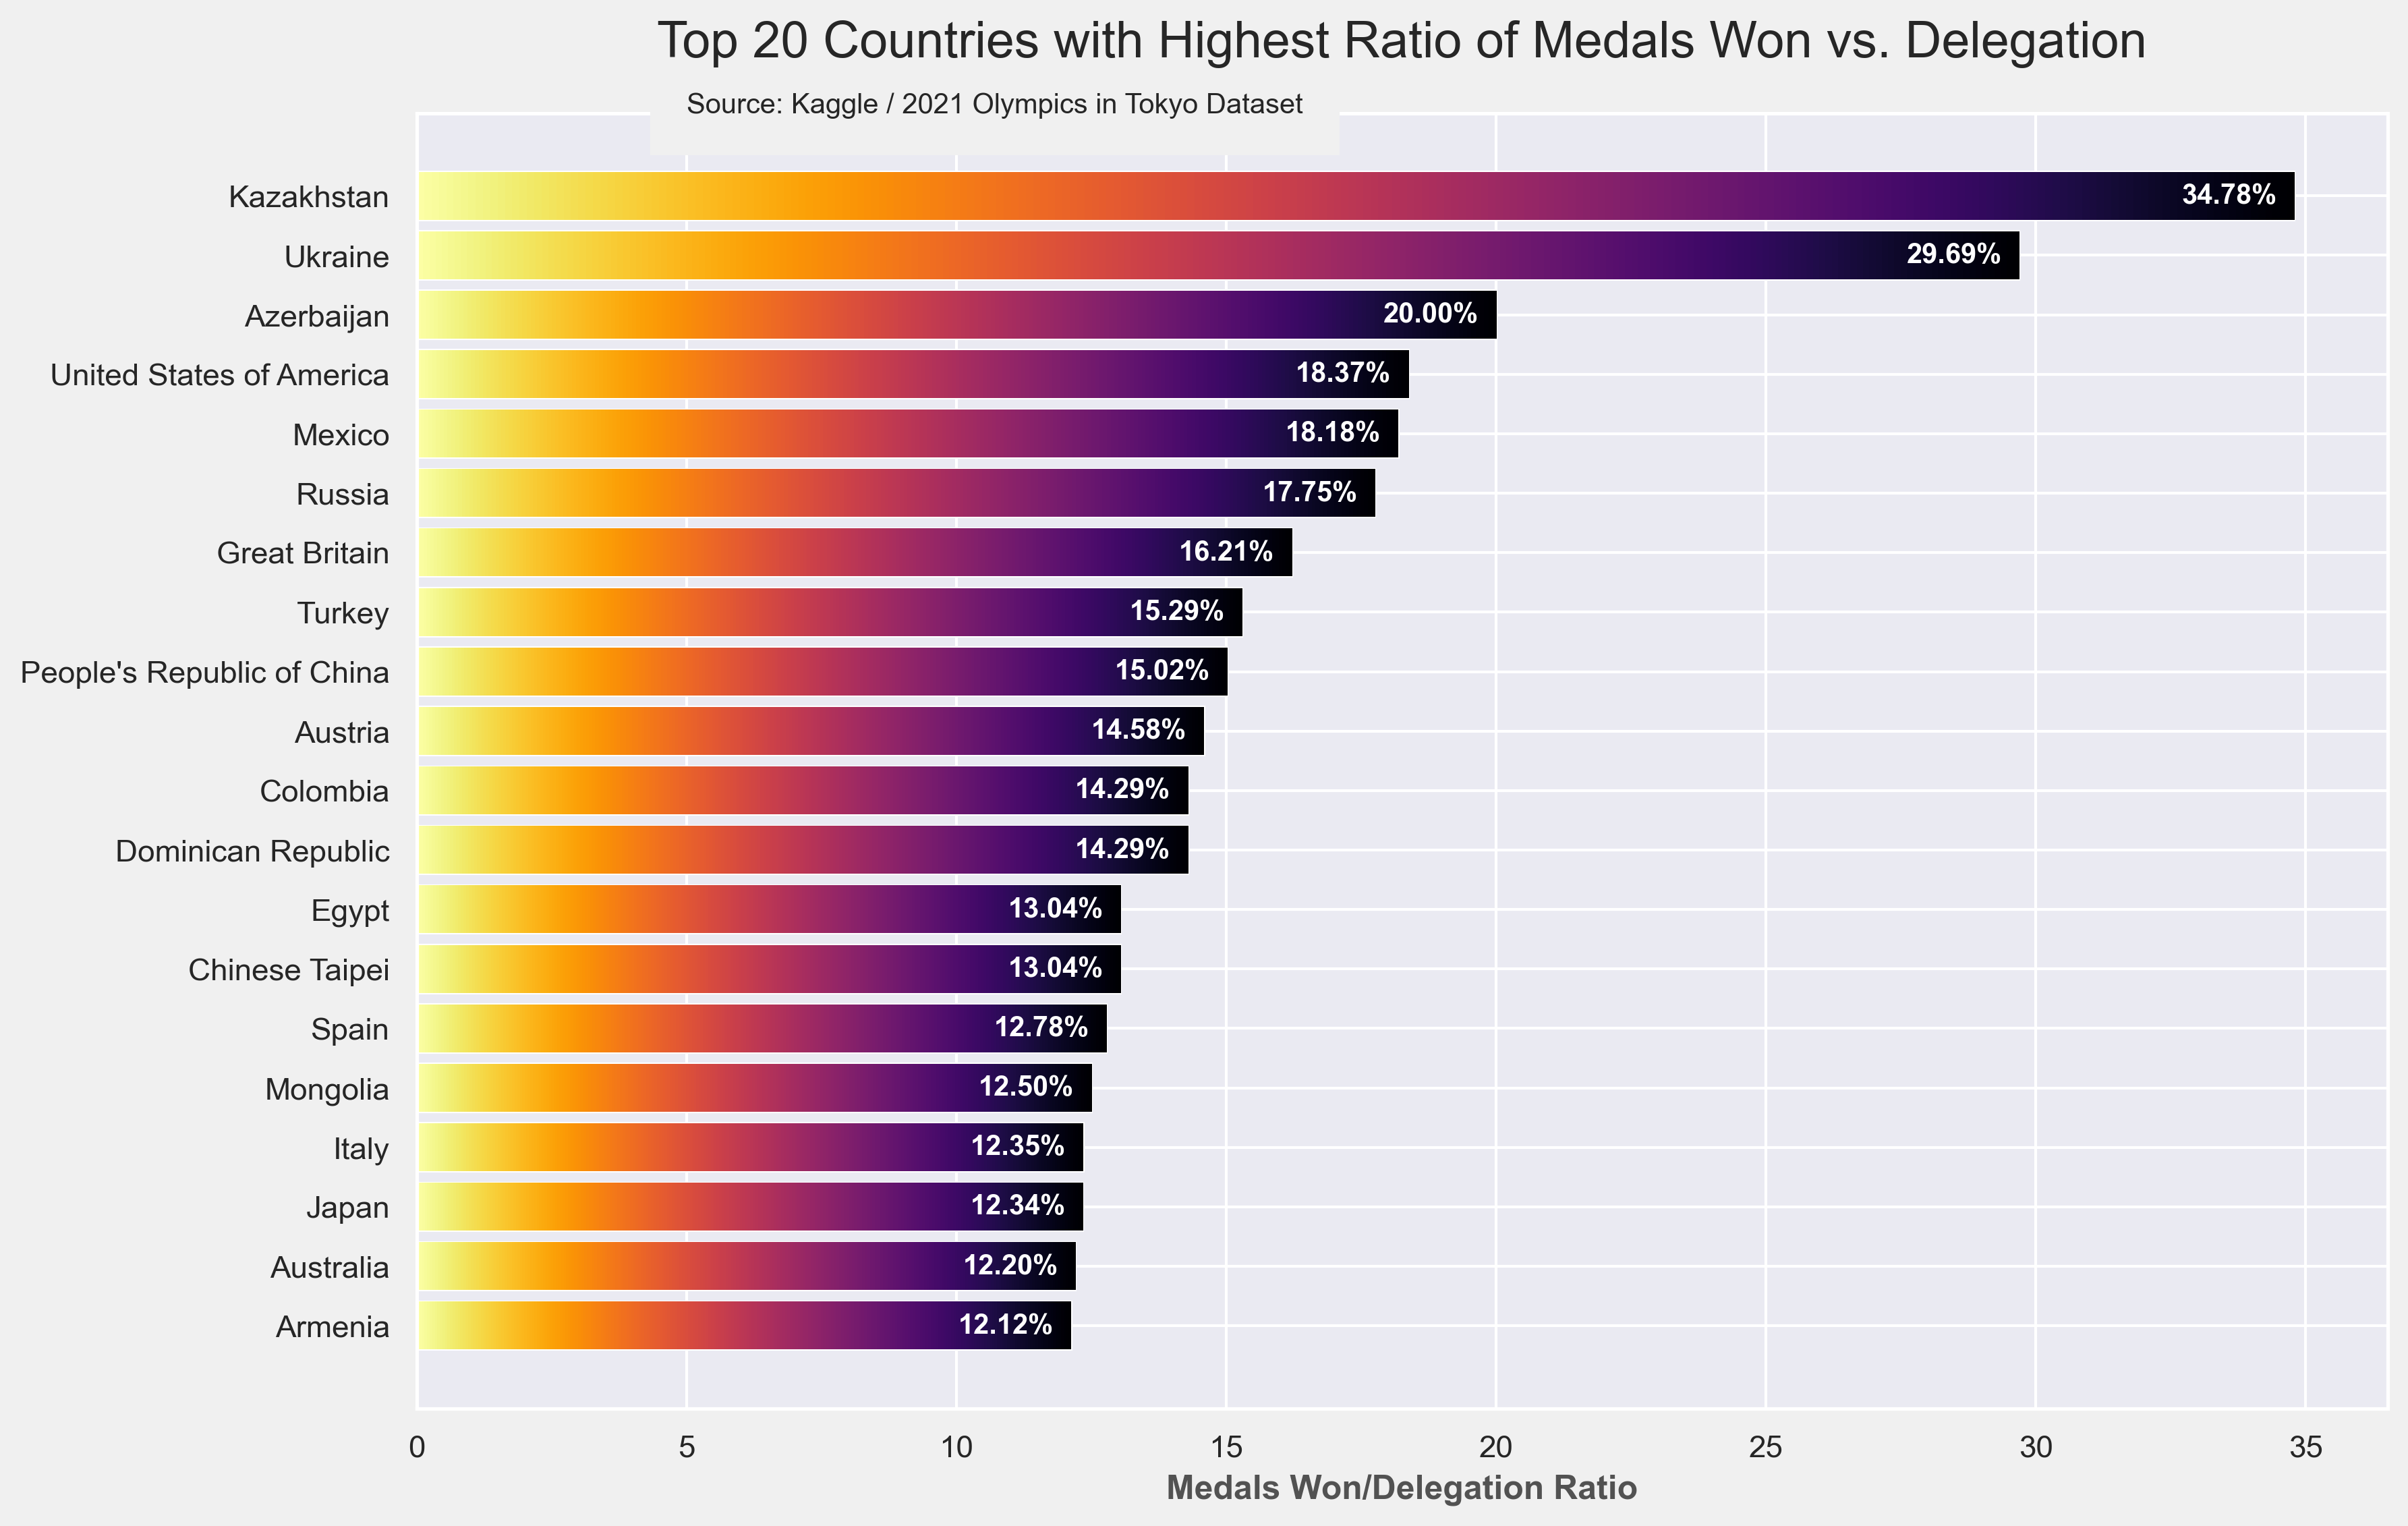

In [43]:
# Define the plot variables

top_20_medal_delegation_ratio = medals_df.sort_values(by='Medals_Delegation_Ratio',ascending=False).reset_index().head(20)

top_20_medal_delegation_ratio.sort_values('Medals_Delegation_Ratio', ascending=True, inplace=True)
index = top_20_medal_delegation_ratio['Country']
values = top_20_medal_delegation_ratio['Medals_Delegation_Ratio']
plot_title = 'Top 20 Countries with Highest Ratio of Medals Won vs. Delegation'
title_size = 18
subtitle = 'Source: Kaggle / 2021 Olympics in Tokyo Dataset'
x_label = 'Medals Won/Delegation Ratio'
filename = 'barh-plot'

# Create the graph figure with a subplot
fig, ax = plt.subplots(figsize=(12,8), facecolor=(.94, .94, .94))
mpl.pyplot.inferno()
plt.rcParams['figure.dpi'] = 300

# Create the bars
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create the title, font size and position
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.5, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# Create the gradient background
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

# Create bar labels/annotations
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -40
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{0:.2f}%'.format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords='offset points',va='center',ha=ha,color = 'white',fontweight = 'bold')            

# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='#525252',fontweight='bold')



#### These are the countries with the better results when taking into consideration the size of their delegation.
#### It's interesting to see Kazakhstan and Ukraine with a good lead. Let's check their results

In [45]:
top_20_medal_delegation_ratio.sort_values('Medals_Delegation_Ratio', ascending=False, inplace=True) 
top_20_medal_delegation_ratio.loc[[0,1]][['Country','Gold','Silver','Bronze','Total','Medals_Delegation_Ratio']]

,Country,Gold,Silver,Bronze,Total,Medals_Delegation_Ratio
0,Kazakhstan,0,0,8,8,34.7826087
1,Ukraine,1,6,12,19,29.6875000


In [46]:
delegation = athletes_df.groupby('NOC').agg({'Name':'count'}).reset_index()
delegation.rename(columns = {'NOC':'Country','Name':'Number of Athletes'},inplace=True)
delegation[delegation['Country'] == 'Kazakhstan']

,Country,Number of Athletes
96,Kazakhstan,92


In [47]:
delegation[delegation['Country'] == 'Ukraine']

,Country,Number of Athletes
192,Ukraine,152


#### Even though Kazakhstan had the better ratio of medals won vs. delegation, all of the country's medals were bronze, kind of bad luck.
#### Ukraine results were a little better. Although it had 12 bronze medals, the country won 6 silver and 1 gold medal.


### Finally, let's check Brazil results in this event

In [78]:
medals_df[medals_df['Country'] == 'Brazil']

,Rank,Country,Gold,Silver,Bronze,Total,Rank by Total,Population,Medals_Population_Ratio,Medals_Delegation_Ratio
11,12,Brazil,7,6,8,21,12,"203,586,000.0000000",0.0000103,7.2164948


In [50]:
bottom_20_medals_ratio[bottom_20_medals_ratio['Country'] == 'Brazil']

,Country,Gold,Silver,Bronze,Total,Rank by Total,Population,Medals_Population_Ratio
68,Brazil,7,6,8,21,12,"203,586,000.0000000",0.0000103


In [81]:
medals_delegation_ratio = medals_df[['Country','Medals_Delegation_Ratio']].sort_values(by='Medals_Delegation_Ratio',
                                                                                       ascending=False).reset_index()
medals_delegation_ratio.drop('index',axis=1,inplace=True)
medals_delegation_ratio[medals_delegation_ratio['Country'] == 'Brazil']

,Country,Medals_Delegation_Ratio
42,Brazil,7.2164948


#### An interesting point here:
* Although Brazil was placed 12th in the ranking of medals, it's only 43th in the ranking of medals/delegation ratio and 69th (!) when it comes to the medals/population ratio. One could read it as a clear sign of a below-average performace, but I'd like to think it has more to do with the lack of investment in projects and initiatives towards sports in the country in general.